<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
from astropy.io import fits
%matplotlib inline

GPU acceleration enabled
using given n: 0
Starting SourceModule Code
Past the SourceModule code
CUDAC Available


In [2]:
res = {}

In [21]:
regions = []
for r in [10,20,30]:
    try:
        res['r{:d}'.format(r)] = ppy.plotting.ResultsPlotter('results/m49_taufull_r{:d}.csv'.format(r),
                                                            run_name='M49 Wide Region {:d}'.format(r))
        res['r{:d}_nm'.format(r)] = ppy.plotting.ResultsPlotter('results/m49_taunomu_r{:d}.csv'.format(r),
                                                            run_name='M49 Wide Region {:d} (Distance Fixed)'.format(r))
#         res['r{:d}_wd'.format(r)] = ppy.plotting.ResultsPlotter('results/m49_tauwide_r{:d}.csv'.format(r),
#                                                             run_name='Region {:d} (Wide)'.format(r))
        regions.append(r)
    except:
        print('r{:d} not found'.format(r))

thin_regions = []
for r in [23, 48, 70]:
    try:
        res['t{:d}'.format(r)] = ppy.plotting.ResultsPlotter('results/m49_taufull-thin_t{:d}.csv'.format(r),
                                                            run_name='M49 Region {:d}'.format(r))
        res['t{:d}_nm'.format(r)] = ppy.plotting.ResultsPlotter('results/m49_taunomu-thin_t{:d}.csv'.format(r),
                                                            run_name='M49 Region {:d} (Distance Fixed)'.format(r))
#         res['r{:d}_wd'.format(r)] = ppy.plotting.ResultsPlotter('results/m49_tauwide_r{:d}.csv'.format(r),
#                                                             run_name='Region {:d} (Wide)'.format(r))
        thin_regions.append(r)
    except:
        print('t{:d} not found'.format(r))        

gauss_regions = []
for r in [23, 48, 70]:
    try:
        res['g{:d}'.format(r)] = ppy.plotting.ResultsPlotter('results/m49_taugauss_t{:d}.csv'.format(r),
                                                            run_name='M49 Gauss Region {:d}'.format(r))
        gauss_regions.append(r)
    except:
        print('g{:d} not found'.format(r))    
        
m31_regions = []
m31_names = {1: 'Bulge', 2: 'Disk'}
for r in [1, 2]:
    try:
        res['m{:d}'.format(r)] = ppy.plotting.ResultsPlotter('results/m31_tau_r{:d}.csv'.format(r),
                                                            run_name='M31 {:s}'.format(m31_names[r]))
        res['m{:d}_nm'.format(r)] = ppy.plotting.ResultsPlotter('results/m31_taunomu_r{:d}.csv'.format(r),
                                                            run_name='M31 {:s} (Distance Fixed)'.format(m31_names[r]))
        m31_regions.append(r)
    except:
        print('m{:d} not found'.format(r))        
widebin_regions = []
for r in [23, 48, 70]:
    try:
        res['w{:d}'.format(r)] = ppy.plotting.ResultsPlotter('results/m49_tauwidebins_t{:d}.csv'.format(r),
                                                            run_name='M49 Widebin Region {:d}'.format(r))
        widebin_regions.append(r)
    except:
        print('w{:d} not found'.format(r))        
        

In [22]:
res

{'g23': <pcmdpy.plotting.ResultsPlotter at 0x2b9163ec4ac8>,
 'g48': <pcmdpy.plotting.ResultsPlotter at 0x2b9163ec4eb8>,
 'g70': <pcmdpy.plotting.ResultsPlotter at 0x2b9163ecb588>,
 'm1': <pcmdpy.plotting.ResultsPlotter at 0x2b916f951eb8>,
 'm1_nm': <pcmdpy.plotting.ResultsPlotter at 0x2b916e7ea898>,
 'm2': <pcmdpy.plotting.ResultsPlotter at 0x2b916f2ec588>,
 'm2_nm': <pcmdpy.plotting.ResultsPlotter at 0x2b9163ecdd68>,
 'r10': <pcmdpy.plotting.ResultsPlotter at 0x2b9180fb7e80>,
 'r10_nm': <pcmdpy.plotting.ResultsPlotter at 0x2b9163ed86a0>,
 'r20': <pcmdpy.plotting.ResultsPlotter at 0x2b916e0df588>,
 'r20_nm': <pcmdpy.plotting.ResultsPlotter at 0x2b9180f62a90>,
 'r30': <pcmdpy.plotting.ResultsPlotter at 0x2b916e0e9eb8>,
 'r30_nm': <pcmdpy.plotting.ResultsPlotter at 0x2b9161597828>,
 't23': <pcmdpy.plotting.ResultsPlotter at 0x2b916f940320>,
 't23_nm': <pcmdpy.plotting.ResultsPlotter at 0x2b916f7c3d30>,
 't48': <pcmdpy.plotting.ResultsPlotter at 0x2b9180c9c2b0>,
 't48_nm': <pcmdpy.plottin

In [23]:
res['r10_nm'].df['dmod'] = 31.3
res['r20_nm'].df['dmod'] = 31.3
res['r30_nm'].df['dmod'] = 31.3
res['t23_nm'].df['dmod'] = 31.3
res['t48_nm'].df['dmod'] = 31.3
res['t70_nm'].df['dmod'] = 31.3
res['m1_nm'].df['dmod'] = 24.42
res['m2_nm'].df['dmod'] = 24.42

In [24]:
xmax = np.max([len(r.df) for r in res.values()])
print(xmax)

15419


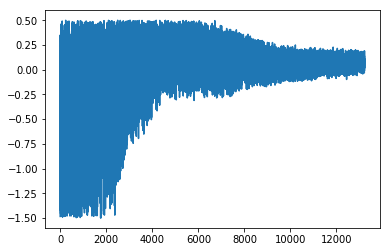

In [25]:
plt.plot(res['r10'].df['logfeh_mean'])

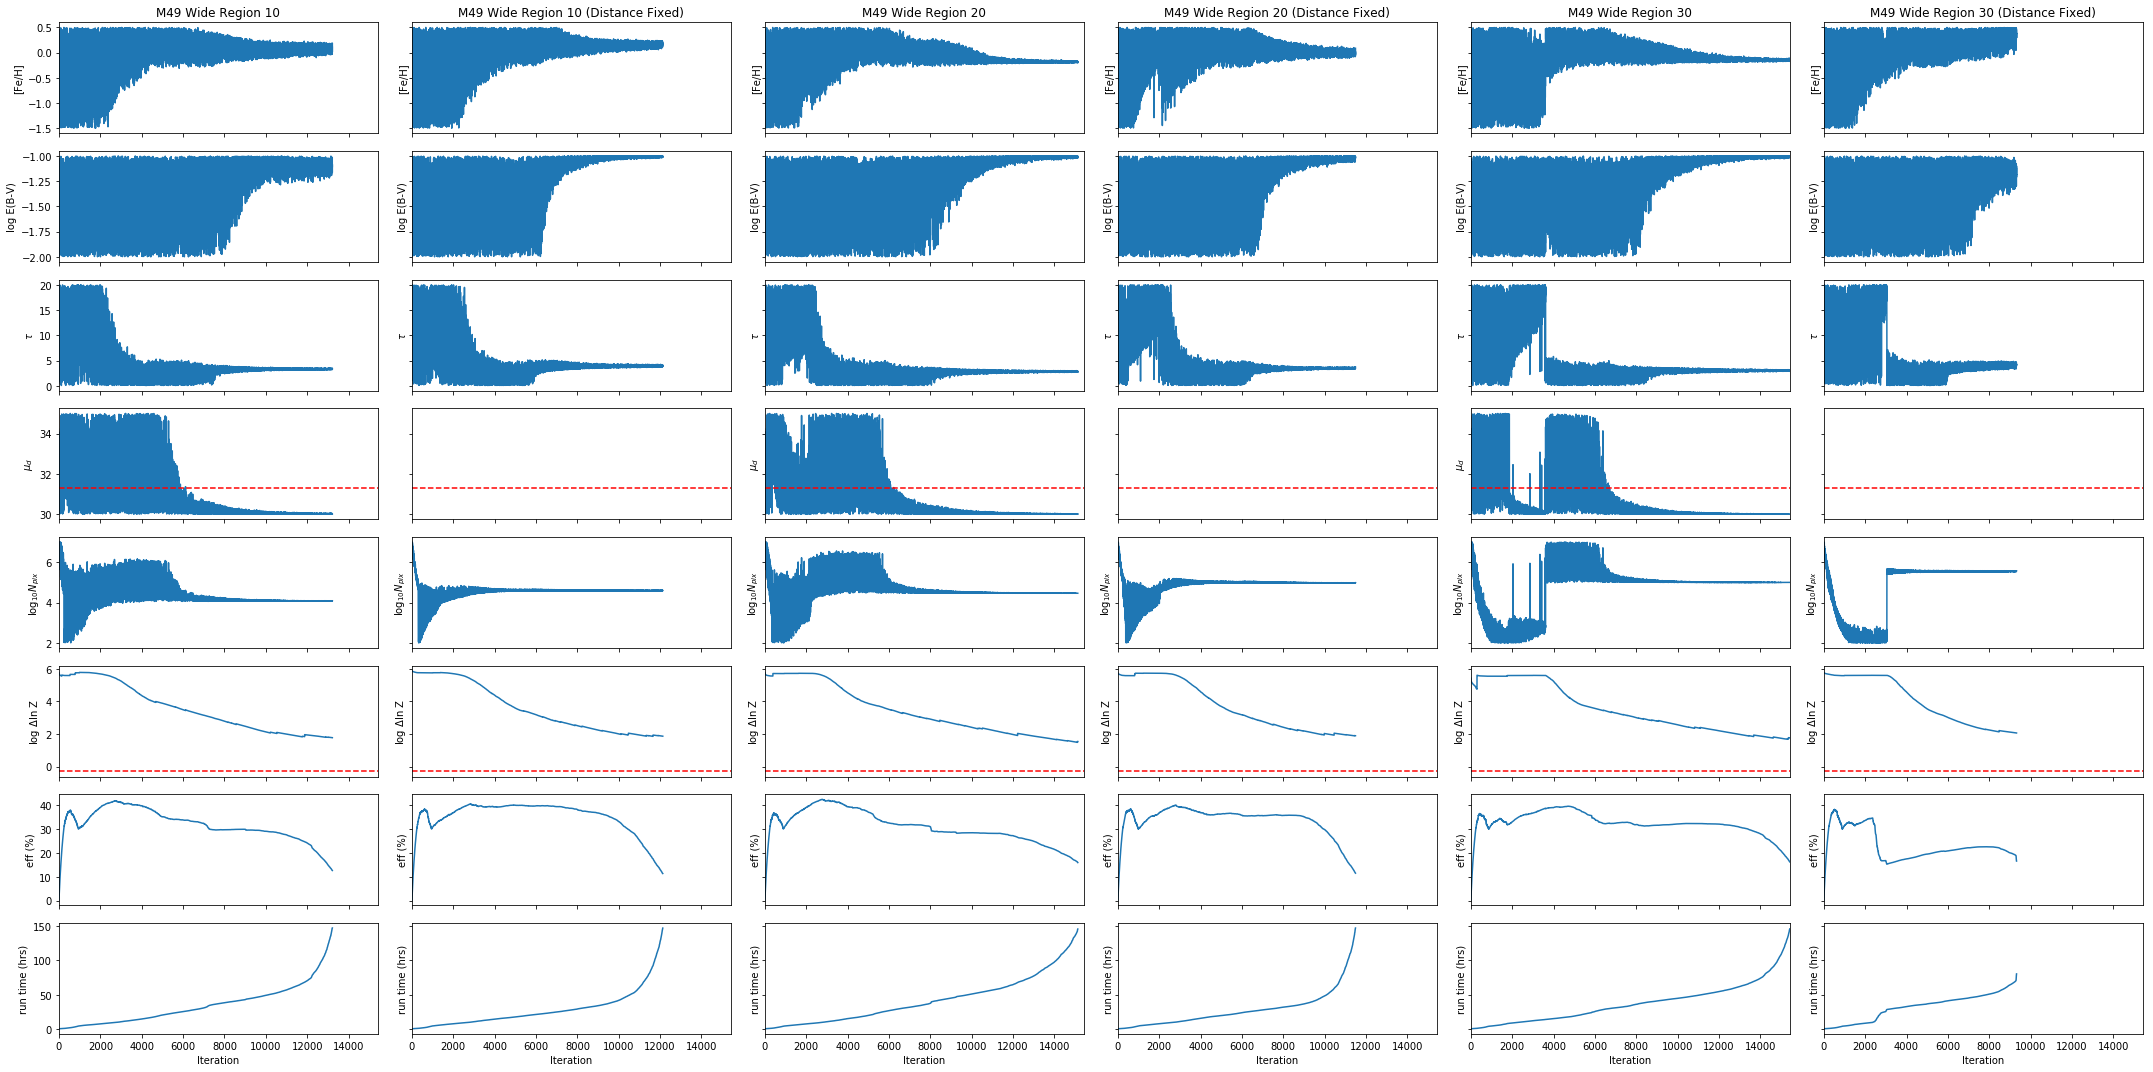

In [26]:
fig, axes = plt.subplots(ncols=2*len(regions), nrows=8, figsize=(30,15), sharex=True, sharey='row')
for i, r in enumerate(regions):
    res['r{:d}'.format(r)].plot_chains(axes=axes[:,2*i])
#     res['r{:d}_wd'.format(r)].plot_chains(axes=axes[:,3*i+1])
    res['r{:d}_nm'.format(r)].plot_chains(axes=axes[np.array([0,1,2,4,5,6,7]),2*i+1])
    for j in range(2):
        axes[3,j+2*i].axhline(y=31.3, ls='--', color='r')
axes[0,0].set_xlim(xmax=xmax)
plt.tight_layout()

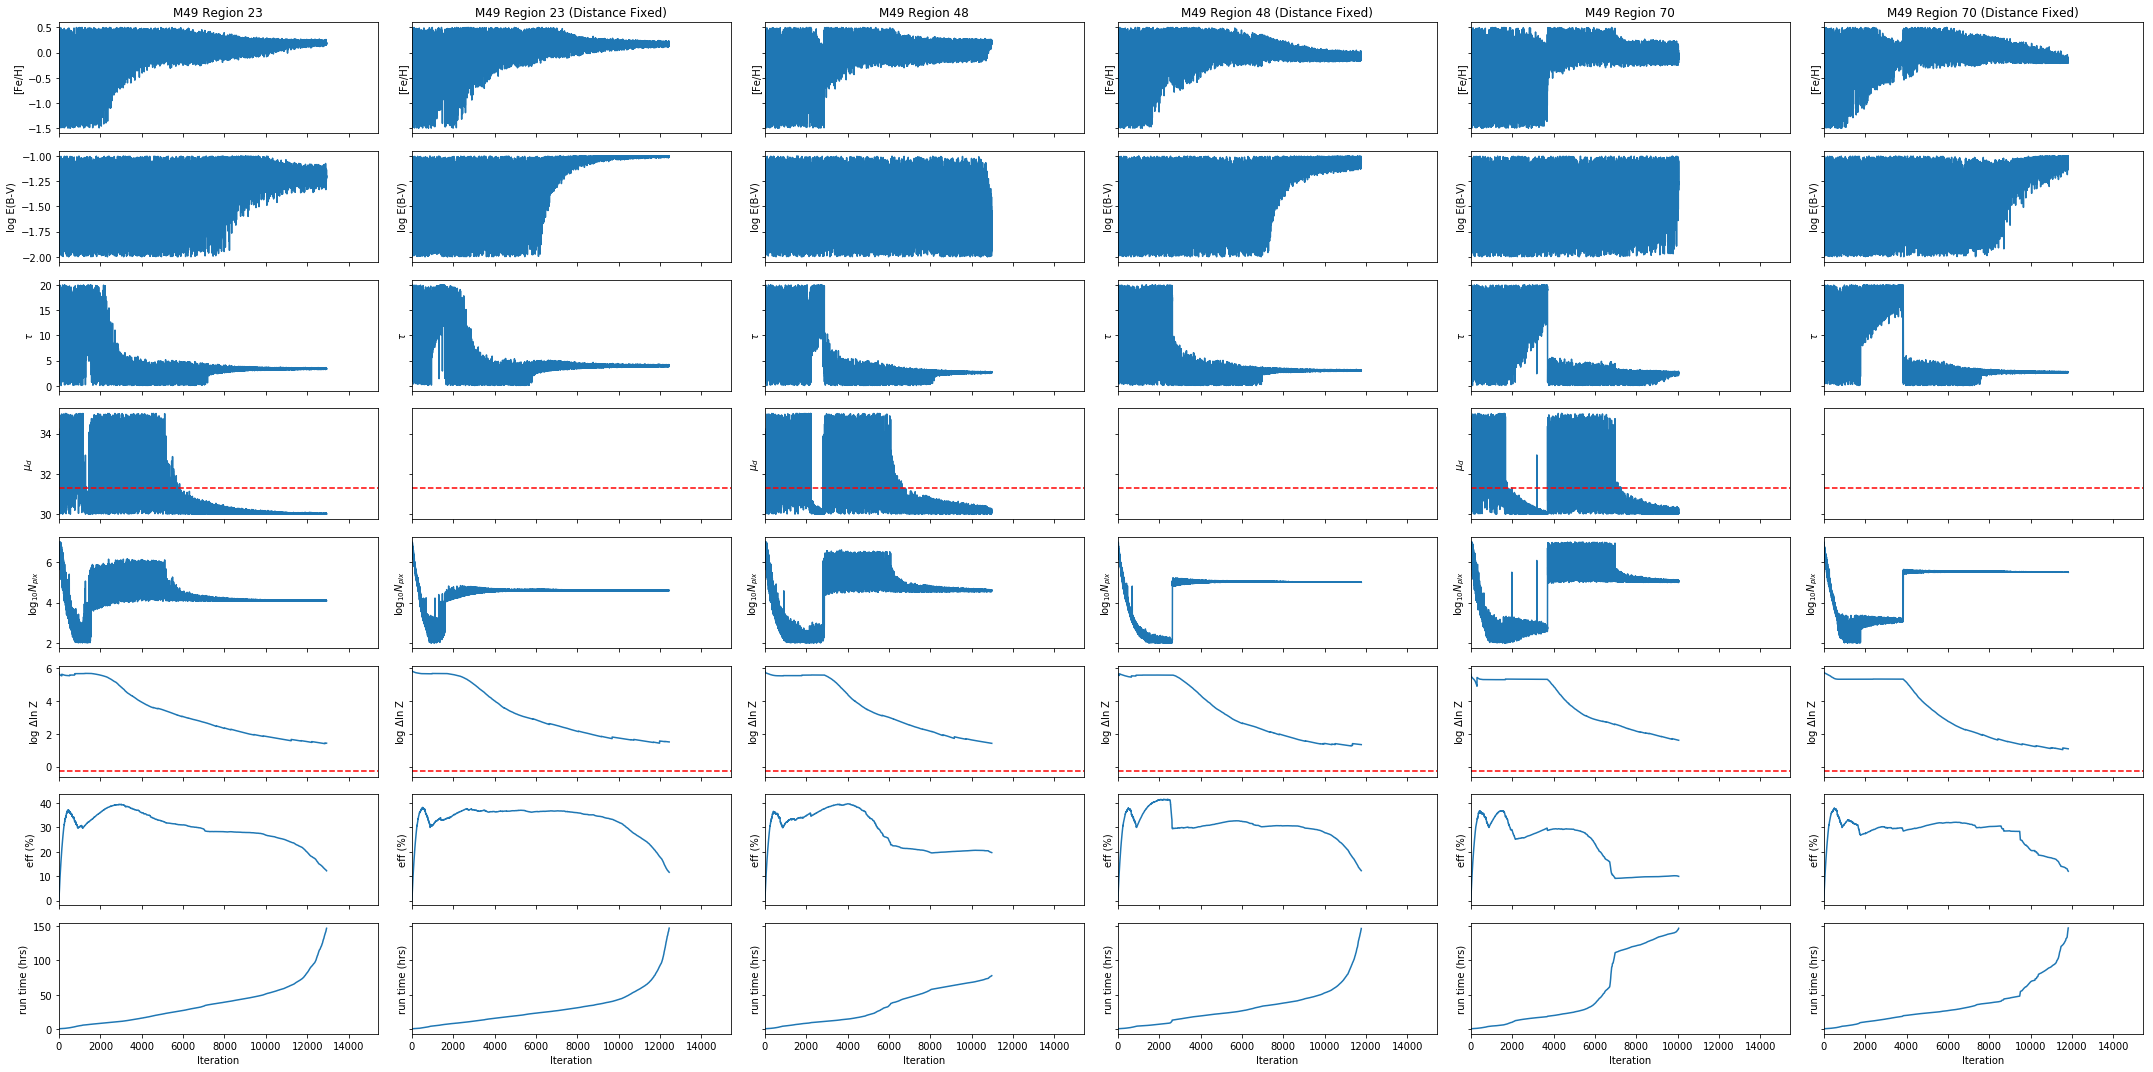

In [27]:
fig, axes = plt.subplots(ncols=2*len(thin_regions), nrows=8, figsize=(30,15), sharex=True, sharey='row')
for i, r in enumerate(thin_regions):
    res['t{:d}'.format(r)].plot_chains(axes=axes[:,2*i])
#     res['r{:d}_wd'.format(r)].plot_chains(axes=axes[:,3*i+1])
    res['t{:d}_nm'.format(r)].plot_chains(axes=axes[np.array([0,1,2,4,5,6,7]),2*i+1])
    for j in range(2):
        axes[3,j+2*i].axhline(y=31.3, ls='--', color='r')
axes[0,0].set_xlim(xmax=xmax)
plt.tight_layout()

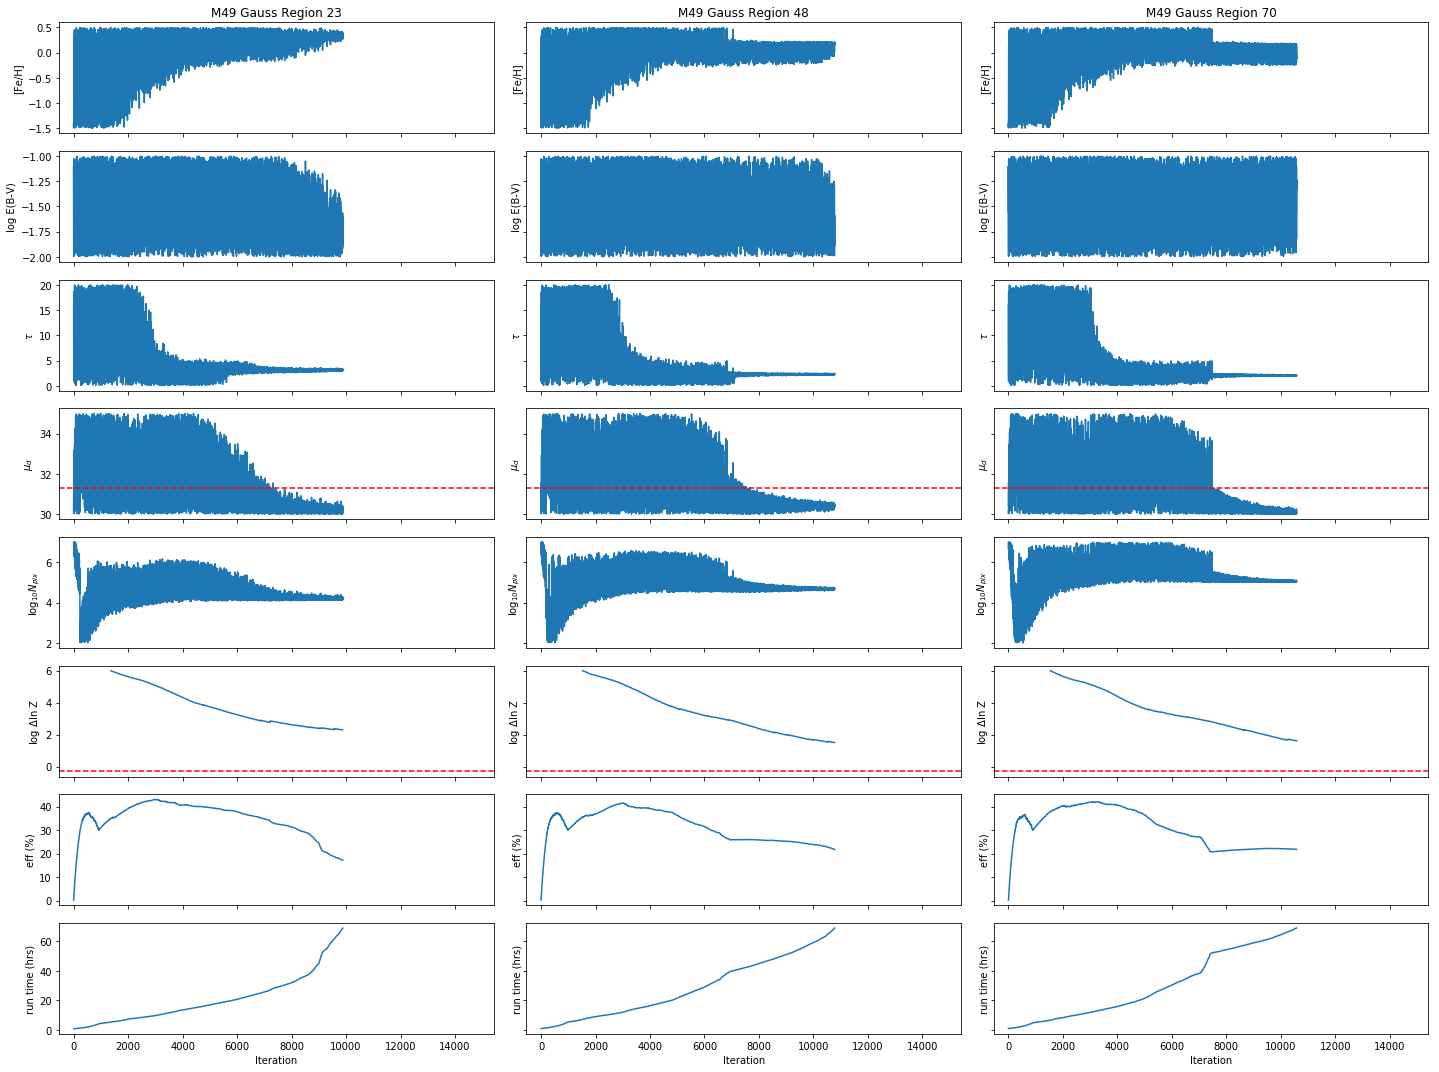

In [28]:
fig, axes = plt.subplots(ncols=len(gauss_regions), nrows=8, figsize=(20,15), sharex=True, sharey='row')
for i, r in enumerate(gauss_regions):
    res['g{:d}'.format(r)].plot_chains(axes=axes[:,i])
    axes[3,i].axhline(y=31.3, ls='--', color='r')
axes[0,0].set_xlim(xmax=xmax)
plt.tight_layout()

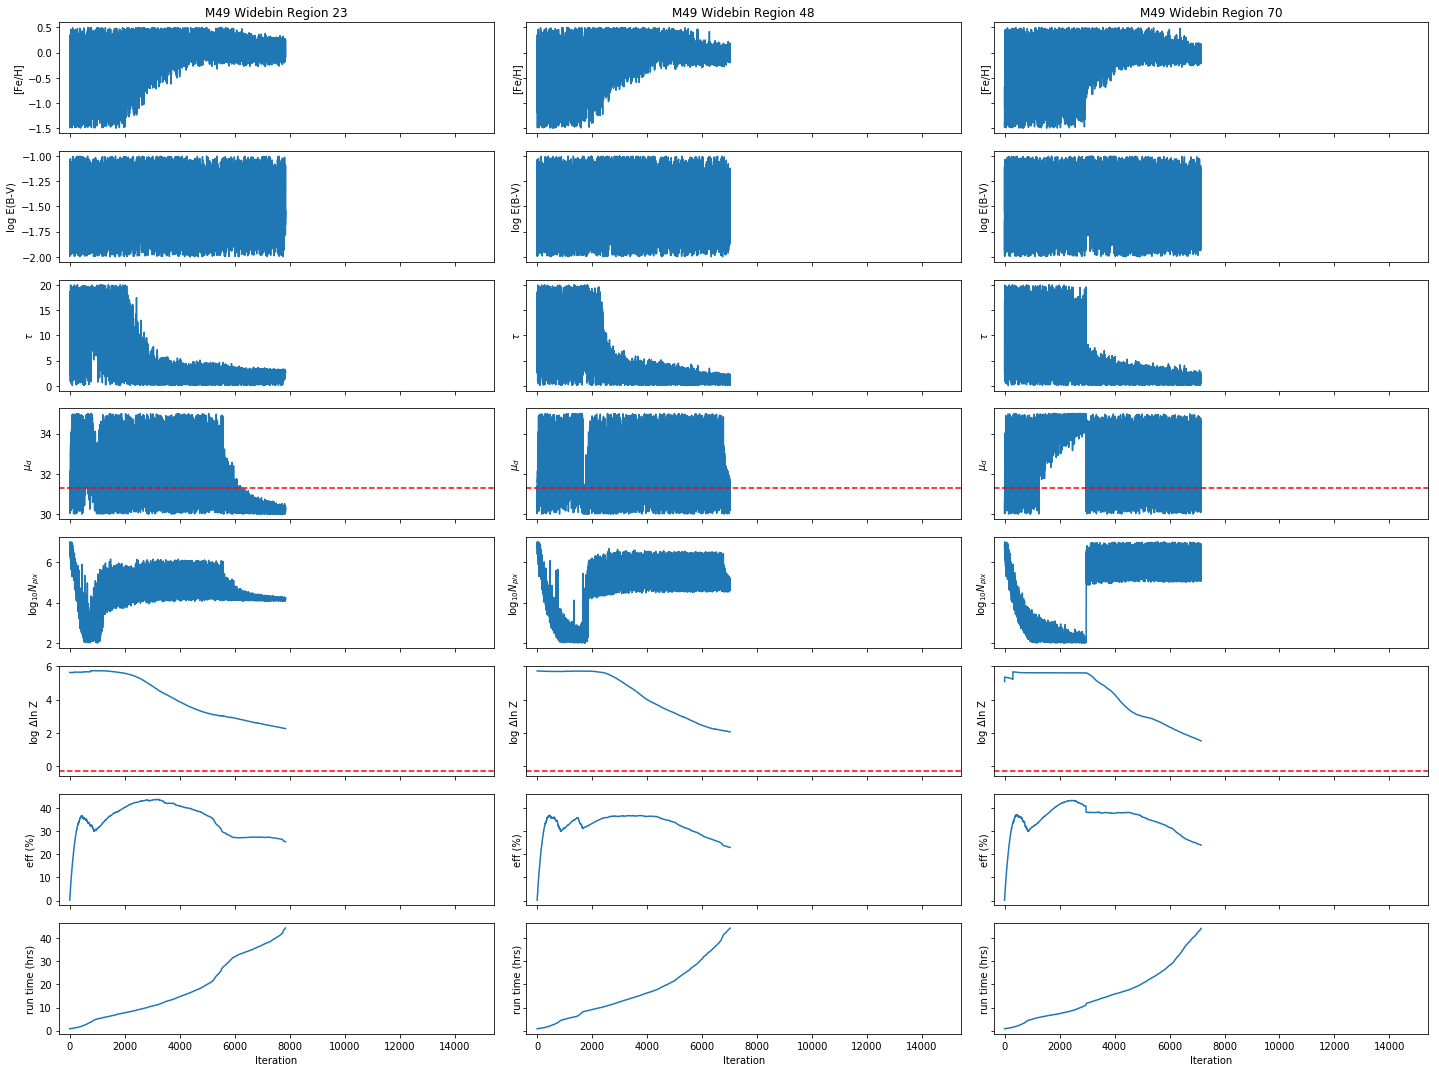

In [29]:
fig, axes = plt.subplots(ncols=len(widebin_regions), nrows=8, figsize=(20,15), sharex=True, sharey='row')
for i, r in enumerate(widebin_regions):
    res['w{:d}'.format(r)].plot_chains(axes=axes[:,i])
    axes[3,i].axhline(y=31.3, ls='--', color='r')
axes[0,0].set_xlim(xmax=xmax)
plt.tight_layout()

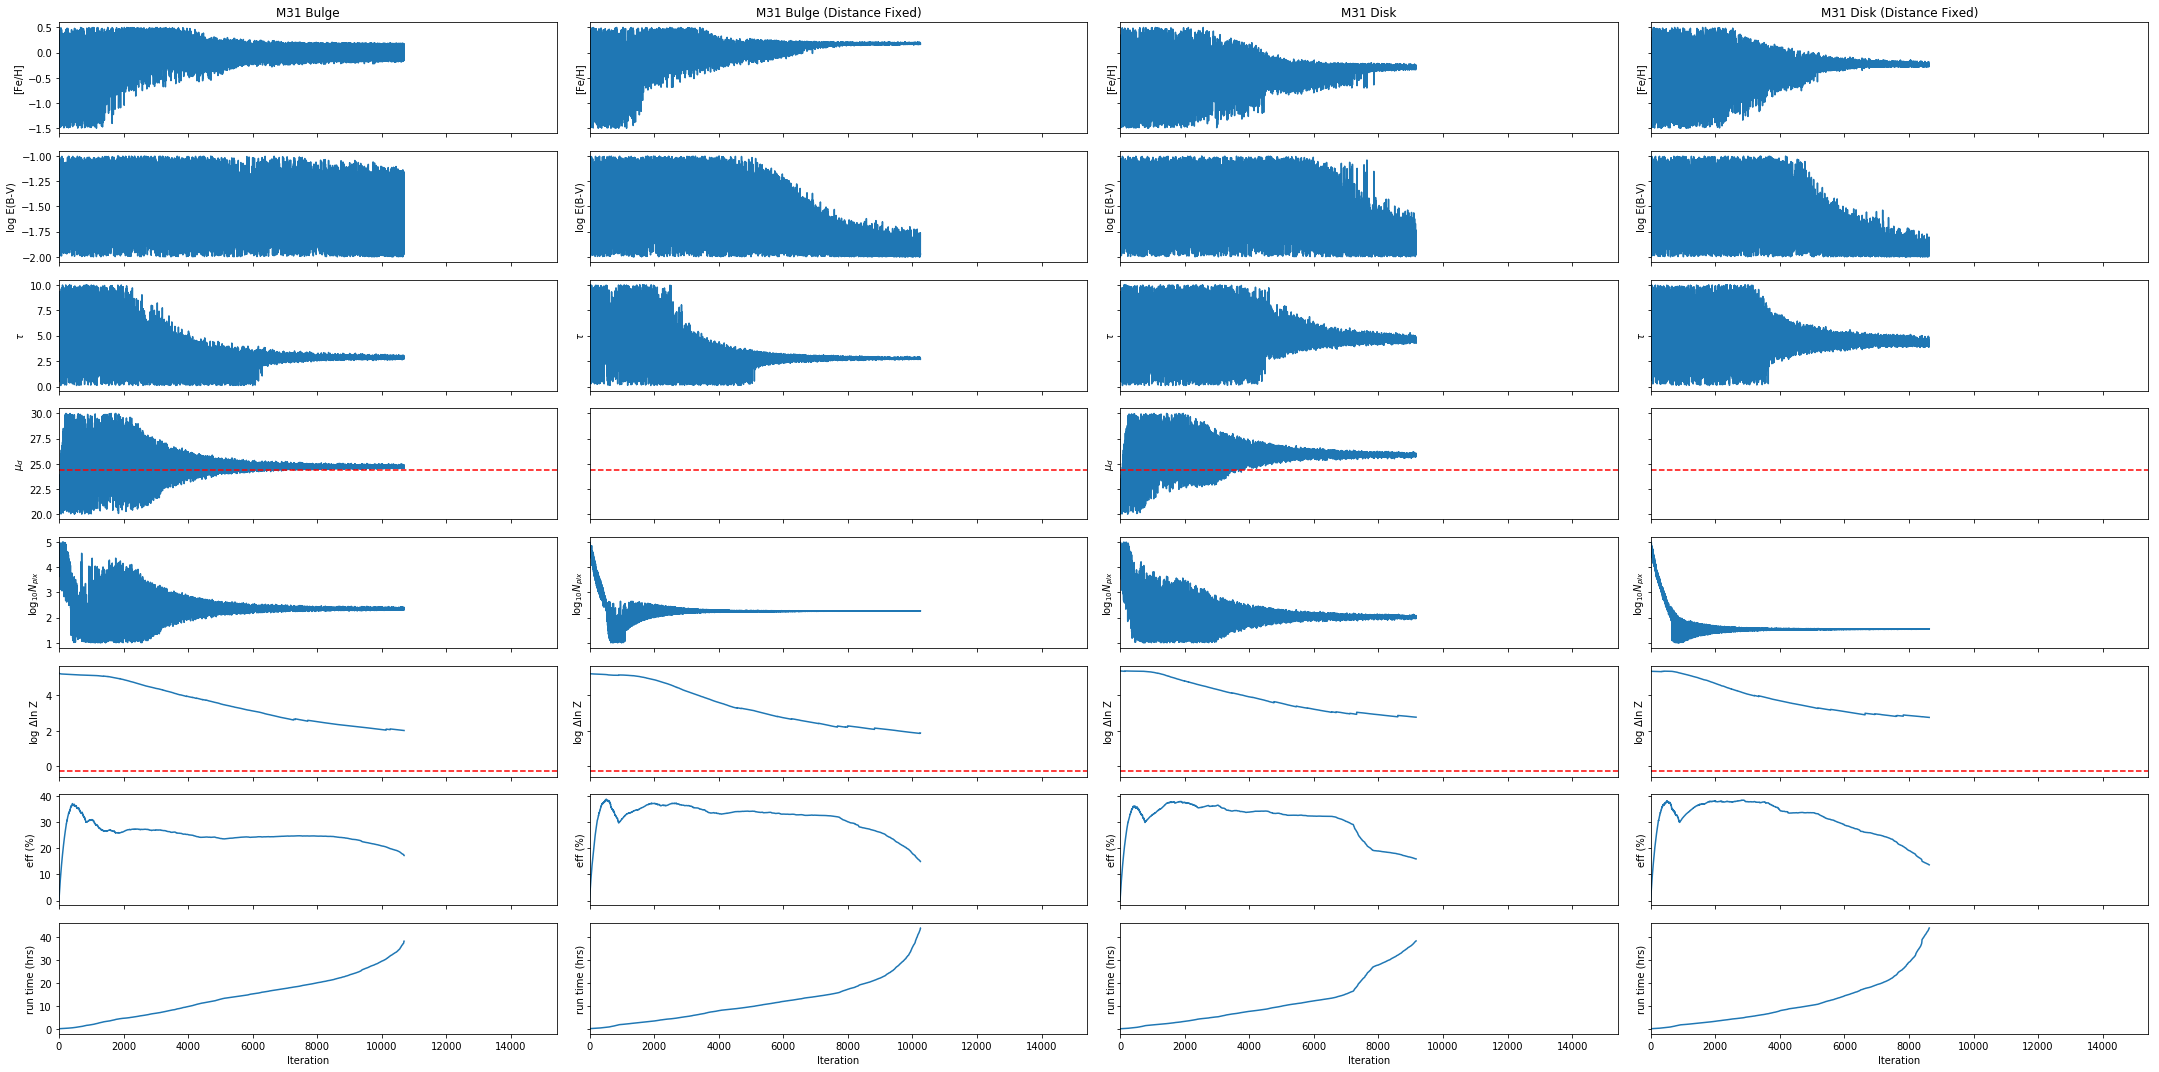

In [30]:
fig, axes = plt.subplots(ncols=2*len(m31_regions), nrows=8, figsize=(30,15), sharex=True, sharey='row')
for i, r in enumerate(m31_regions):
    res['m{:d}'.format(r)].plot_chains(axes=axes[:,2*i])
#     res['r{:d}_wd'.format(r)].plot_chains(axes=axes[:,3*i+1])
    res['m{:d}_nm'.format(r)].plot_chains(axes=axes[np.array([0,1,2,4,5,6,7]),2*i+1])
    for j in range(2):
        axes[3,j+2*i].axhline(y=24.42, ls='--', color='r')
axes[0,0].set_xlim(xmax=xmax)
plt.tight_layout()

(0.5, 1.5)

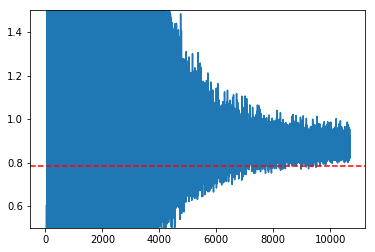

In [52]:
plt.plot(dmod_to_mpc(res['m1'].df['dmod']))
plt.axhline(y=dmod_to_mpc(24.47), color='r', ls='--')
plt.ylim([.5, 1.5])

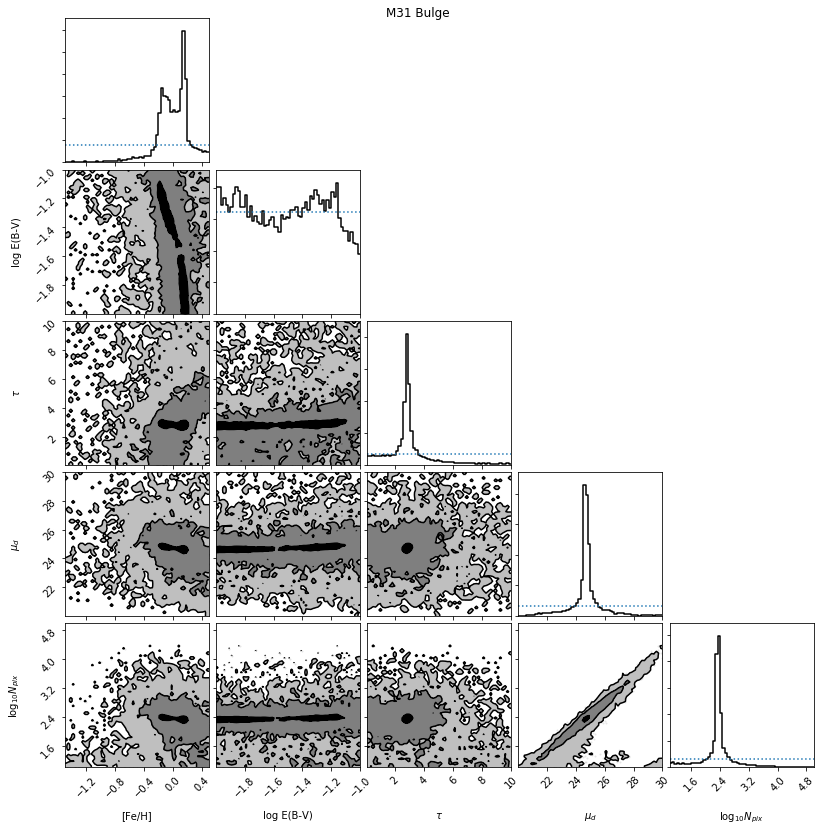

In [67]:
res['m1'].plot_corner(burn=1000, bins=60);

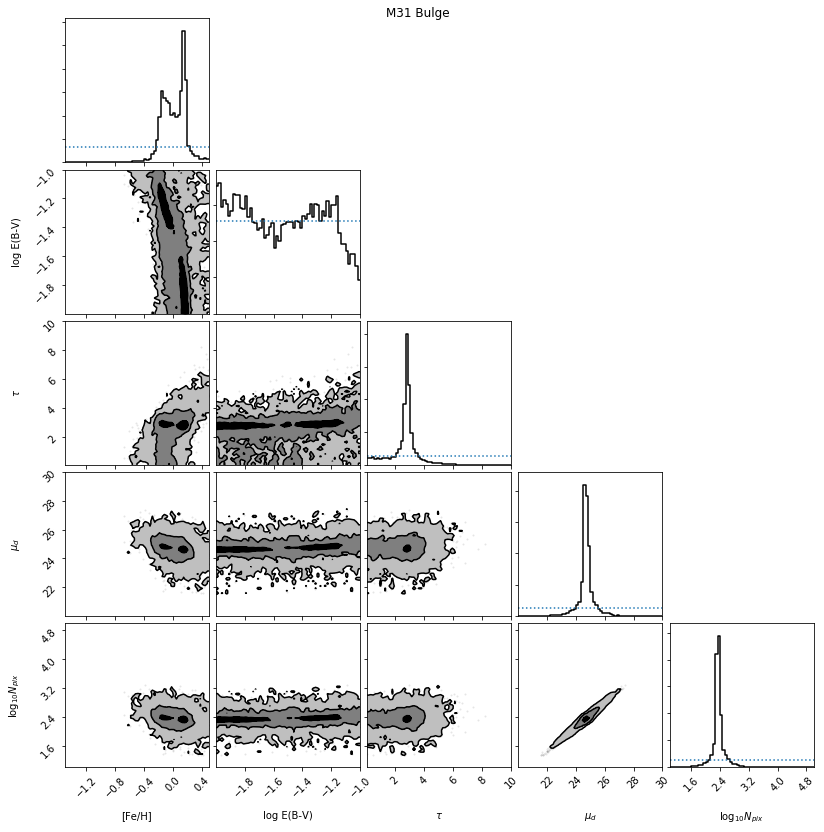

In [69]:
res['m1'].plot_corner(burn=3000, bins=60);

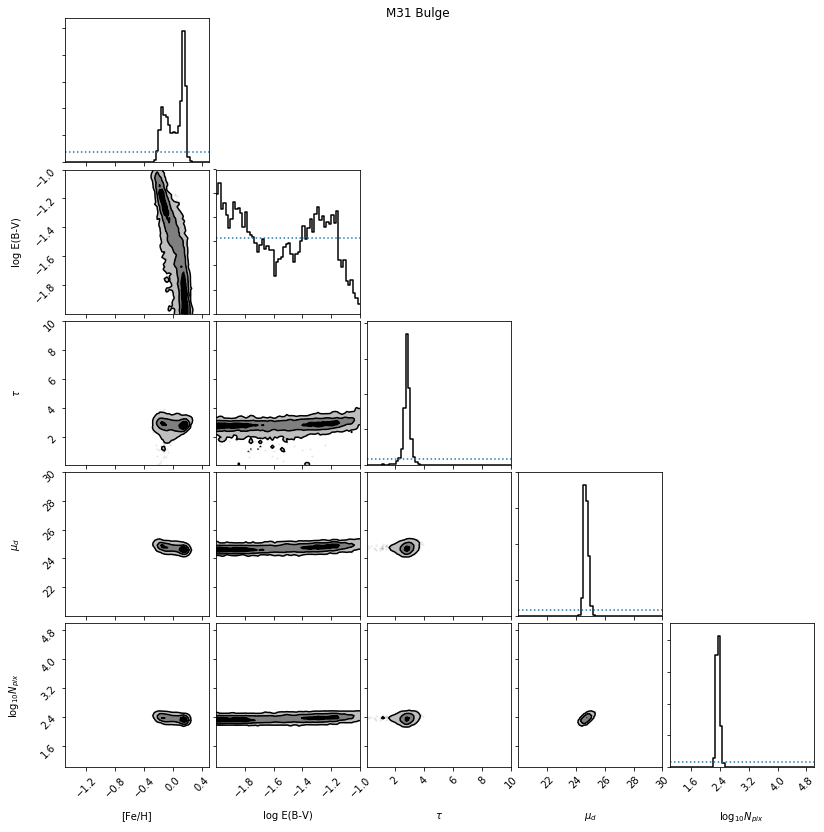

In [71]:
res['m1'].plot_corner(burn=6000, bins=60);

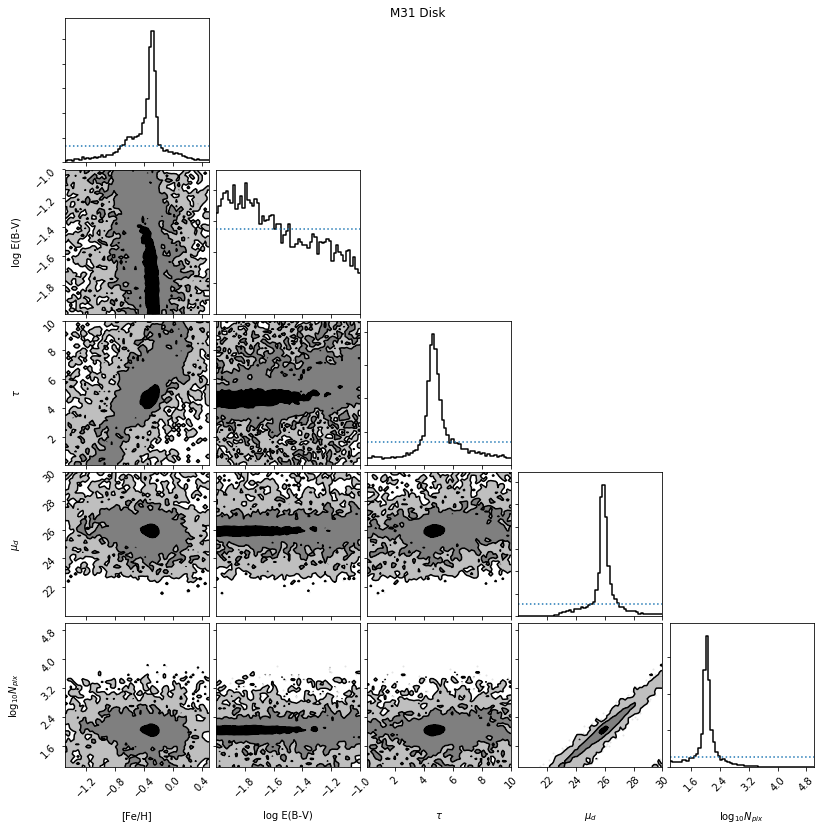

In [73]:
res['m2'].plot_corner(burn=1000, bins=60);

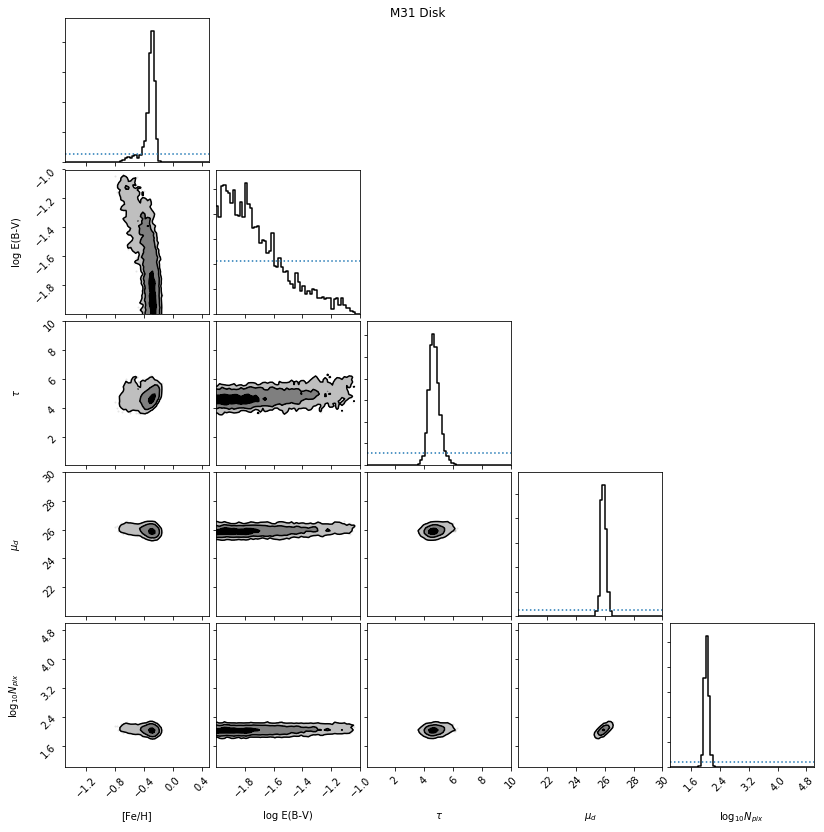

In [74]:
res['m2'].plot_corner(burn=6000, bins=60);

In [39]:
def dmod_to_mpc(dmod):
    return 10.**(0.2*(dmod - 25))

In [42]:
dmod_to_mpc(24.47)

0.7834296427662114

In [43]:
dmod_to_mpc(26)

1.5848931924611136

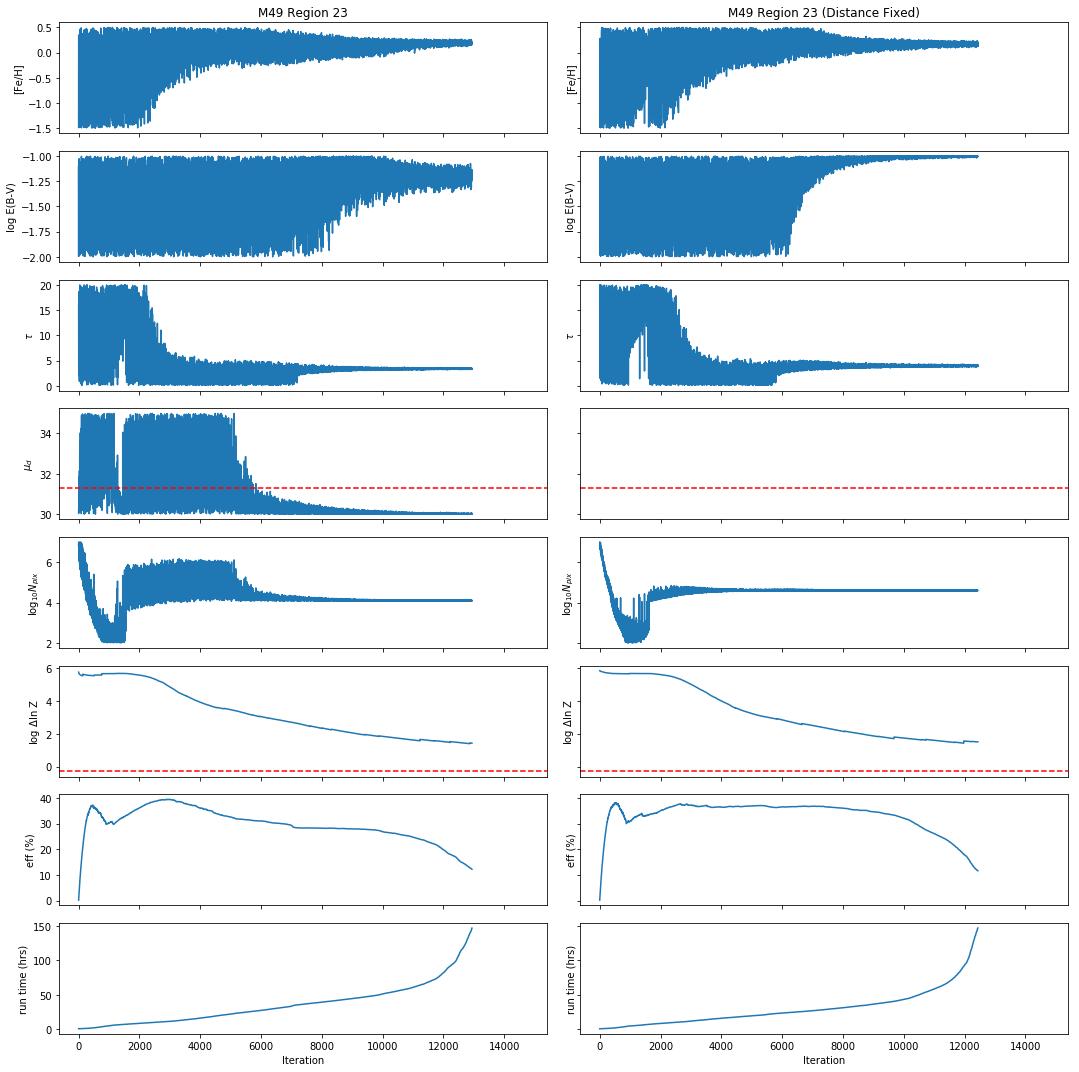

In [31]:
t = 23
fig, axes = plt.subplots(ncols=2, nrows=8, figsize=(15,15), sharex=True, sharey='row')
res['t{:d}'.format(t)].plot_chains(axes=axes[:,0])
res['t{:d}_nm'.format(t)].plot_chains(axes=axes[np.array([0,1,2,4,5,6,7]),1])
for j in range(2):
    axes[3,j].axhline(y=31.3, ls='--', color='r')
axes[0,0].set_xlim(xmax=xmax)
plt.tight_layout()
plt.savefig('figures/m49_chains_t{:d}.jpg'.format(t))
plt.savefig('figures/m49_chains_t{:d}.pdf'.format(t))

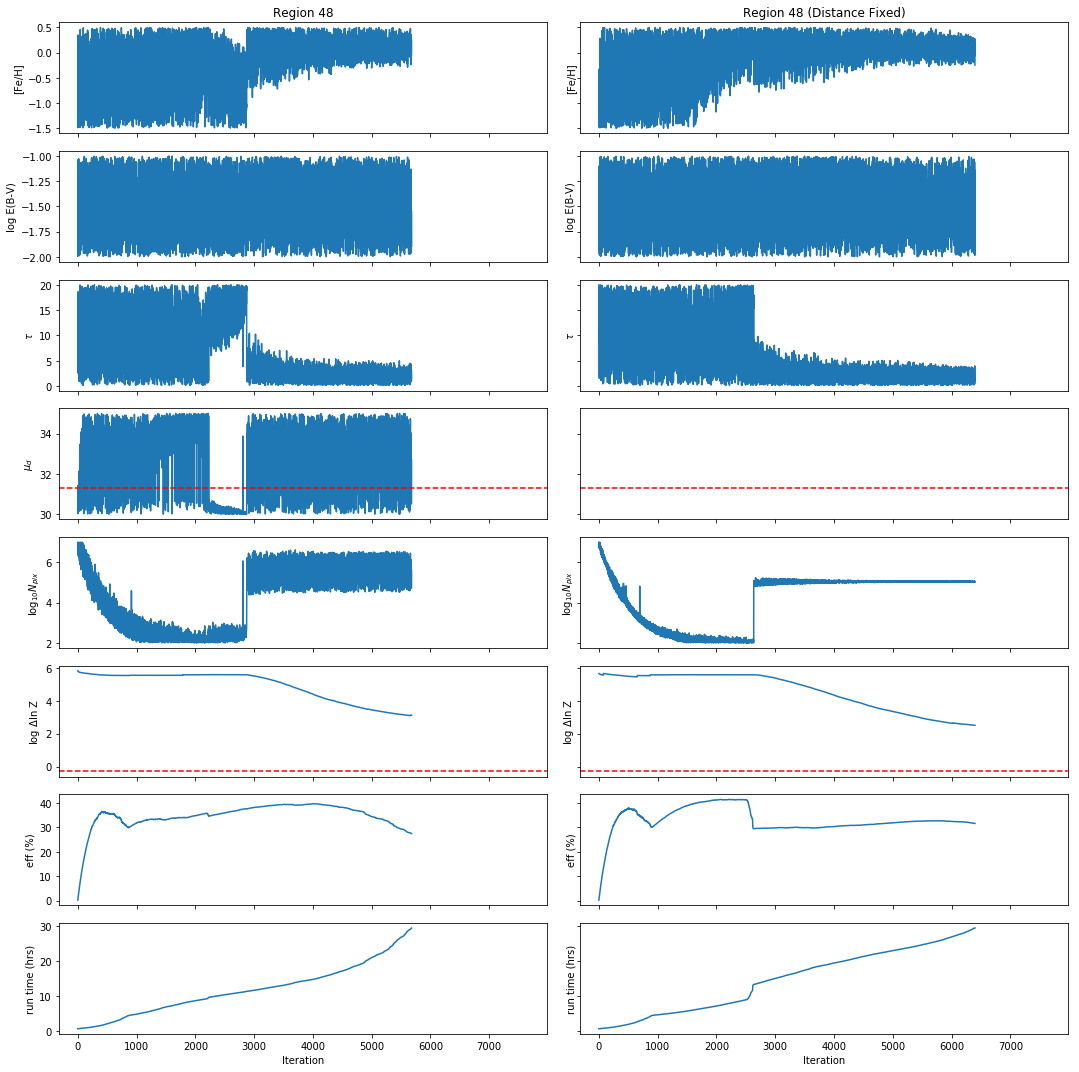

In [12]:
t = 48
fig, axes = plt.subplots(ncols=2, nrows=8, figsize=(15,15), sharex=True, sharey='row')
res['t{:d}'.format(t)].plot_chains(axes=axes[:,0])
res['t{:d}_nm'.format(t)].plot_chains(axes=axes[np.array([0,1,2,4,5,6,7]),1])
for j in range(2):
    axes[3,j].axhline(y=31.3, ls='--', color='r')
axes[0,0].set_xlim(xmax=xmax)
plt.tight_layout()
plt.savefig('figures/m49_chains_t{:d}.jpg'.format(t))
plt.savefig('figures/m49_chains_t{:d}.pdf'.format(t))

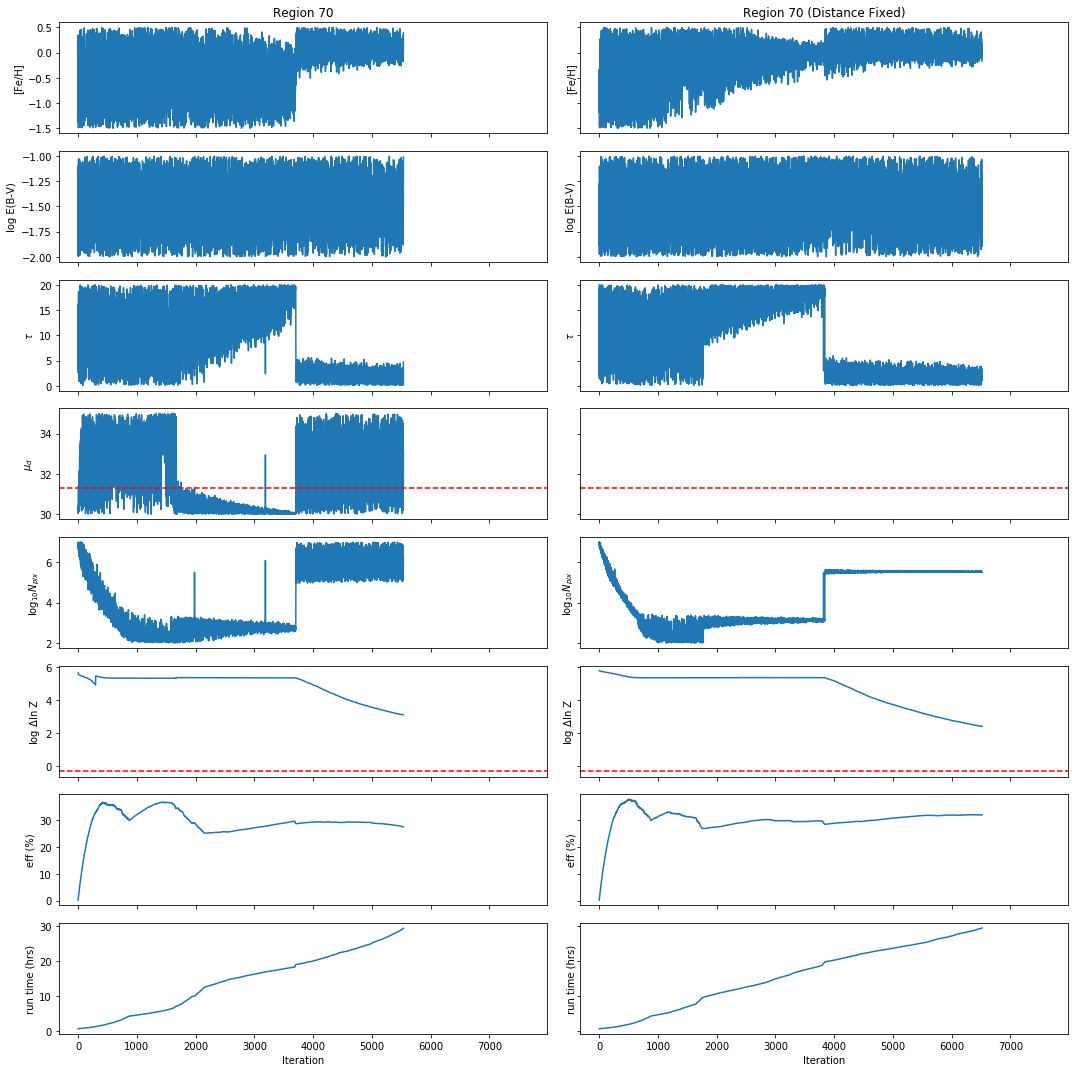

In [13]:
t = 70
fig, axes = plt.subplots(ncols=2, nrows=8, figsize=(15,15), sharex=True, sharey='row')
res['t{:d}'.format(t)].plot_chains(axes=axes[:,0])
res['t{:d}_nm'.format(t)].plot_chains(axes=axes[np.array([0,1,2,4,5,6,7]),1])
for j in range(2):
    axes[3,j].axhline(y=31.3, ls='--', color='r')
axes[0,0].set_xlim(xmax=xmax)
plt.tight_layout()
plt.savefig('figures/m49_chains_t{:d}.jpg'.format(t))
plt.savefig('figures/m49_chains_t{:d}.pdf'.format(t))

In [50]:
res['r10'].df.tail(1)[['niter', 'logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod']]

,niter,logfeh_mean,logdust,logNpix,tau,dmod
218,219.0,-0.08832,-1.6214,6.0822,12.806,34.657


In [14]:
res['r10_nm'].df.tail(1)[['niter', 'logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod']]

,niter,logfeh_mean,logdust,logNpix,tau,dmod
228,229.0,-0.84726,-1.7481,5.1877,4.2317,31.3


In [15]:
res['r20'].df.tail(1)[['niter', 'logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod']]

,niter,logfeh_mean,logdust,logNpix,tau,dmod
208,209.0,-0.79729,-1.5418,4.6282,13.798,30.018


In [16]:
res['r20_nm'].df.tail(1)[['niter', 'logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod']]

,niter,logfeh_mean,logdust,logNpix,tau,dmod
228,229.0,-1.108,-1.9613,5.0793,11.336,31.3


In [17]:
res['r30'].df.tail(1)[['niter', 'logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod']]

,niter,logfeh_mean,logdust,logNpix,tau,dmod
208,209.0,-1.1333,-1.293,4.9231,9.3411,31.669


In [18]:
res['r30_nm'].df.tail(1)[['niter', 'logfeh_mean', 'logdust', 'logNpix', 'tau', 'dmod']]

,niter,logfeh_mean,logdust,logNpix,tau,dmod
228,229.0,-0.85975,-1.4733,5.1486,17.642,31.3
